In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
# from pythonds.basic.stack import Stack
from math import *
import random
from sklearn.neighbors import KDTree
# from cosmoCalc import cosmoCalcfunc

In [13]:
# Define all relevant physical variables needed throughout the program, including:
# - number of LRG sources
# - number of survey (non-LRG) sources
# - coordinates for LRGs
# - coordinates for survey sources
# - projected radius from LRGs
# - LRG redshift
# - gmag and rmag for survey sources
# - gmag and rmag for LRGs
# - (g-r) color survey sources
# - (g-r) color for LRGs

# Number of LRG sources
lrg = 50

# Number of survey (non-LRG) sources
survey = 350

# Fake coordinates for LRG sources
random.seed(1)
x0 = [np.random.uniform(0,5) for j in range(lrg)]

random.seed(2)
y0 = [np.random.uniform(0,5) for j in range(lrg)]

# y0 = random.sample(y0, len(y0))
print("length of fake LRG sources (ra) = ", len(x0))
print("length of fake LRG sources (dec) = ", len(y0))
# print("x0 = ", x0)
# print("y0 = ", y0)
# print(type(y0))

# Fake coordinates for survey sources
random.seed(3)
x1 = [np.random.uniform(0,5) for j in range(survey)]

random.seed(4)
y1 = [np.random.uniform(0,5) for j in range(survey)]
# y1 = random.sample(y1, len(y1))
    
print("length of fake survey sources (ra) = ", len(x1))
print("length of fake survey sources (dec) = ", len(y1))    

# In order for there to be at least one guaranteed satellite, combine the survey and lrg position arrays so that one
# survey source position is the same as an LRG position
x_plus = np.concatenate([x0, x1])
y_plus = np.concatenate([y0, y1])

# print("length of x_plus (ra) (lrgs + survey) =", len(x_plus))
# print("length of y_plus (dec) (lrg + survey) =", len(y_plus))

# Redshift for LRG 
random.seed(0.2)
z = [np.random.uniform(0.1,0.5) for j in range(lrg)]
    
print("length of array of redshifts for fake LRGs =", len(z))
print("max z = ", np.amax(z))
print("min z = ", np.amin(z))

# Magnitudes for survey sources
random.seed(15)
gmag_plus = [np.random.uniform(14,29) for j in range(len(x_plus))]
random.seed(16)
rmag_plus = [np.random.uniform(13,24) for j in range(len(x_plus))]

gmag_plus = np.array(gmag_plus)
rmag_plus = np.array(rmag_plus)
color_plus = gmag_plus - rmag_plus
    
# print("length of gmag for survey soruces =", len(gmag_plus))
# print("length of rmag for survey soruces =", len(rmag_plus))
# print("max gmag_plus = ", np.amax(gmag_plus))
# print("min gmag_plus = ", np.amin(gmag_plus))
# print("max rmag_plus = ", np.amax(rmag_plus))
# print("min rmag_plus = ", np.amin(rmag_plus))
# print("length of color_plus = ", len(color_plus))
# print("max color = ", np.amax(color_plus))
# print("min color = ", np.amin(color_plus))

random.seed(15)
gmag_survey = [np.random.uniform(14,29) for j in range(len(x1))]
random.seed(16)
rmag_survey = [np.random.uniform(13,24) for j in range(len(x1))]

gmag_survey = np.array(gmag_survey)
rmag_survey = np.array(rmag_survey)
color_survey = gmag_survey - rmag_survey
    
print("length of gmag for survey soruces =", len(gmag_survey))
print("length of rmag for survey soruces =", len(rmag_survey))
print("max gmag_plus = ", np.amax(gmag_survey))
print("min gmag_plus = ", np.amin(gmag_survey))
print("max rmag_plus = ", np.amax(rmag_survey))
print("min rmag_plus = ", np.amin(rmag_survey))
print("length of color_plus = ", len(color_survey))
print("max color = ", np.amax(color_survey))
print("min color = ", np.amin(color_survey))

# Magnitudes for LRG sources
random.seed(20)
gmag_lrg = [np.random.uniform(17,23) for j in range(lrg)]
random.seed(21)
rmag_lrg = [np.random.uniform(16,21) for j in range(lrg)]
    
print("length of gmag for survey soruces =", len(gmag_lrg))
print("length of rmag for survey soruces =", len(rmag_lrg))
print("max gmag_lrg = ", np.amax(gmag_lrg))
print("min gmag_lrg = ", np.amin(gmag_lrg))
print("max rmag_lrg = ", np.amax(rmag_lrg))
print("min rmag_lrg = ", np.amin(rmag_lrg))

gmag_lrg = np.array(gmag_lrg)
rmag_lrg = np.array(rmag_lrg)
color_lrg = gmag_lrg - rmag_lrg
print("length of color_lrg = ", len(color_lrg))

distance = 0.5 # in Mpc
print("distance in Mpc =", distance)
distance_kpc = distance * 10.**3. # in kpc
print("distance in kpc = ", distance_kpc)

length of fake LRG sources (ra) =  50
length of fake LRG sources (dec) =  50
length of fake survey sources (ra) =  350
length of fake survey sources (dec) =  350
length of array of redshifts for fake LRGs = 50
max z =  0.48396235874925586
min z =  0.10061781819135814
length of gmag for survey soruces = 350
length of rmag for survey soruces = 350
max gmag_plus =  28.865729409731976
min gmag_plus =  14.009738723024245
max rmag_plus =  23.99749295414511
min rmag_plus =  13.002960625264024
length of color_plus =  350
max color =  15.08722091873138
min color =  -9.4095780499816
length of gmag for survey soruces = 50
length of rmag for survey soruces = 50
max gmag_lrg =  22.96247887044032
min gmag_lrg =  17.36209697588184
max rmag_lrg =  20.898263463580292
min rmag_lrg =  16.10676257312322
length of color_lrg =  50
distance in Mpc = 0.5
distance in kpc =  500.0


In [14]:
# cosmoCalc function to find comoving radial distance (DCMR_Mpc) and scale (kpc_DA)

def cosmoCalc(z):

# 	import numpy as np
# 	from math import sqrt
# 	from math import exp
# 	from math import sin
# 	from math import pi

# Calculate scale to get areas
	H0 = 69.6
	WM = 0.286
	WV = 0.714
# z = 0.209855

# initialize constants

	WR = 0.        # Omega(radiation)
	WK = 0.        # Omega curvaturve = 1-Omega(total)
	c = 299792.458 # velocity of light in km/sec
	Tyr = 977.8    # coefficent for converting 1/H into Gyr
	DTT = 0.5      # time from z to now in units of 1/H0
	DTT_Gyr = []  # value of DTT in Gyr
	age = 0.5      # age of Universe in units of 1/H0
	age_Gyr = []  # value of age in Gyr
	zage = 0.1     # age of Universe at redshift z in units of 1/H0
	zage_Gyr = [] # value of zage in Gyr
	DCMR = 0.0     # comoving radial distance in units of c/H0
	DCMR_Mpc = [] 
	DCMR_Gyr = []
	DA = 0.0       # angular size distance
	DA_Mpc = []
	DA_Gyr = []
	kpc_DA = []
	DL = 0.0       # luminosity distance
	DL_Mpc = []
	DL_Gyr = []   # DL in units of billions of light years
	V_Gpc = []
	a = 1.0        # 1/(1+z), the scale factor of the Universe
	az = 0.5       # 1/(1+z(object))

	h = H0/100.
	WR = 4.165E-5/(h*h)   # includes 3 massless neutrino species, T0 = 2.72528
	WK = 1.-WM-WR-WV

	for j in range(len(z)):
		az = 1.0/(1+1.0*z[j])
		age = 0.
		n=1000         # number of points in integrals
		for i in range(n):
			a = az*(i+0.5)/n
			adot = sqrt(WK+(WM/a)+(WR/(a*a))+(WV*a*a))
			age = age + 1./adot

		zage = az*age/n
		zage_Gyr.append((Tyr/H0)*zage)
		DTT = 0.0
		DCMR = 0.0

	# do integral over a=1/(1+z) from az to 1 in n steps, midpoint rule
		for i in range(n):
			a = az+(1.-az)*(i+0.5)/n
			adot = sqrt(WK+(WM/a)+(WR/(a*a))+(WV*a*a))
			DTT = DTT + 1./adot
			DCMR = DCMR + 1./(a*adot)

		DTT = (1.-az)*DTT/n
		DCMR = (1.-az)*DCMR/n
		age = DTT+zage
		age_Gyr.append(age*(Tyr/H0))
		DTT_Gyr.append((Tyr/H0)*DTT)
		DCMR_Gyr.append((Tyr/H0)*DCMR)
		DCMR_Mpc.append((c/H0)*DCMR)

	# tangential comoving distance

		ratio = 1.00
		x = sqrt(abs(WK))*DCMR
		if x > 0.1:
			if WK > 0:
				ratio =  0.5*(exp(x)-exp(-x))/x 
			else:
				ratio = sin(x)/x
		else:
			y = x*x
		if WK < 0: y = -y
		ratio = 1. + y/6. + y*y/120.
		DCMT = ratio*DCMR
		DA = az*DCMT
		DA_Mpc.append((c/H0)*DA)
		kpc_DA.append(DA_Mpc[j]/206.264806)
		DA_Gyr.append((Tyr/H0)*DA)
		DL = DA/(az*az)
		DL_Mpc.append((c/H0)*DL)
		DL_Gyr.append((Tyr/H0)*DL)

	# comoving volume computation

		ratio = 1.00
		x = sqrt(abs(WK))*DCMR
		if x > 0.1:
			if WK > 0:
				ratio = (0.125*(exp(2.*x)-exp(-2.*x))-x/2.)/(x*x*x/3.)
			else:
				ratio = (x/2. - sin(2.*x)/4.)/(x*x*x/3.)
		else:
			y = x*x
			if WK < 0: y = -y
			ratio = 1. + y/5. + (2./105.)*y*y
		VCM = ratio*DCMR*DCMR*DCMR/3.
		V_Gpc.append(4.*pi*((0.001*c/H0)**3)*VCM)

	return(age_Gyr, zage_Gyr, DTT_Gyr, DL_Mpc, DL_Gyr, V_Gpc, DA_Mpc, DA_Gyr, DCMR_Mpc, DCMR_Gyr, kpc_DA, DL_Mpc, DL_Gyr)


age_Gyr, zage_Gyr, DTT_Gyr, DL_Mpc, DL_Gyr, V_Gpc, DA_Mpc, DA_Gyr, DCMR_Mpc, DCMR_Gyr, kpc_DA, DL_Mpc, DL_Gyr = cosmoCalc(z)


H:
[[0. 0. 0. 0. 0. 4. 4. 4. 9. 3. 5. 2. 4.]
 [0. 0. 0. 0. 3. 3. 4. 6. 7. 2. 8. 3. 0.]
 [0. 0. 0. 0. 2. 3. 5. 6. 6. 7. 3. 5. 0.]
 [0. 0. 0. 0. 2. 4. 7. 3. 4. 3. 7. 0. 0.]
 [0. 0. 0. 2. 6. 3. 7. 0. 5. 4. 1. 0. 0.]
 [0. 0. 2. 3. 3. 5. 3. 5. 3. 4. 1. 0. 0.]
 [0. 0. 6. 8. 6. 2. 5. 1. 5. 0. 0. 0. 0.]
 [0. 4. 7. 4. 2. 7. 2. 3. 8. 1. 0. 0. 0.]
 [0. 5. 3. 5. 5. 5. 2. 2. 0. 0. 0. 0. 0.]
 [1. 1. 3. 6. 2. 2. 4. 3. 1. 0. 0. 0. 0.]
 [4. 7. 2. 4. 3. 6. 7. 1. 0. 0. 0. 0. 0.]]
-------
shape H
(11, 13)
sd:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.23456790e-08 1.23456790e-08 1.23456790e-08
  2.77777778e-08 9.25925926e-09 1.54320988e-08 6.17283951e-09
  1.23456790e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.25925926e-09 9.25925926e-09 1.23456790e-08 1.85185185e-08
  2.16049383e-08 6.17283951e-09 2.46913580e-08 9.25925926e-09
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.17283951e-09 9.25925926e-09 1.5

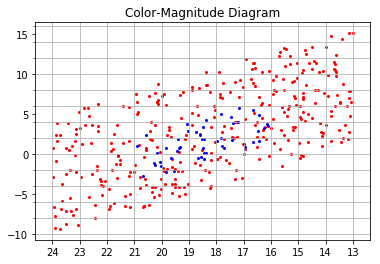

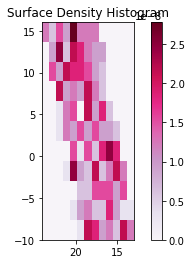

xedges =  [13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24.]
yedges =  [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.  12.  14.  16.]


In [15]:
# Calculate surface density as a function of color and magniude by making a 2D histogram and dividing by the area
# of the survey space

# Create a 2D histogram that creates evenly-spaced bins and counts the points in each bin
# H is the matrix with the number of points per bin
# xedges, yedges are the bounds of the bins
# H, xedges, yedges = np.histogram2d(x0, y0, bins=[5,5], normed=False)

# row = 5
# column = 5

xedges = np.array([13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])
yedges = np.array([-10., -8., -6., -4., -2., 0., 2., 4., 6., 8., 10., 12., 14., 16.]) 

# xedges =  [ 13.,  15.,  17.,   19.,  21., 24.]
# yedges =  [ -10.,  -5.,   0.,   5.,  11., 16.]

# creates histogram for survey sources; excluses LRGs
H, xedges, yedges = np.histogram2d(rmag_survey, color_survey, bins=(xedges,yedges), normed=False)
print("H:")
print(H)
print('-------')
print('shape H')
print(np.shape(H))

# Uses the numbers counted in the histogram to calculate a surface density: For each cell, the number of sources
# divided by the area 
sd = H/(25. * (3600.**2.)) # converts 25 square degrees to square arcseconds
print("sd:")
print(sd)
print('-------')

# Scatter plot of points with bin lines drawn
fig, ax = plt.subplots()
ax.set_xticks(xedges, minor=False)
ax.set_yticks(yedges, minor=True)
ax.xaxis.grid(True, which='major')
ax.yaxis.grid(True, which='minor')

plt.scatter(rmag_survey, color_survey, s = 4, color='red')
plt.scatter(rmag_lrg, color_lrg, s = 4, color='blue')
plt.gca().invert_xaxis()
plt.title("Color-Magnitude Diagram")
plt.show()

# color codes bins by surface density with color bar; should make sense when compared to scatter plot
plt.imshow(sd, cmap=plt.cm.PuRd, extent=(xedges[0], xedges[len(xedges)-1], yedges[0], yedges[len(yedges)-1]))
plt.colorbar(orientation='vertical')
plt.gca().invert_xaxis()
plt.title("Surface Density Histogram")
plt.show()

# Playing with only plotting one bin at a time. Not useful now but I don't want to forget it.
# dx = x[np.where((x>=xedges[1]) & (x<=xedges[2]) & (y>=yedges[1]) & (y<=yedges[2]))]
# dy = y[np.where((x>=xedges[1]) & (x<=xedges[2]) & (y>=yedges[1]) & (y<=yedges[2]))]

# plt.scatter(dx,dy)
# plt.show()

# print(H.shape)

# print(sd[0,0])
# print(sd[0,1])
# print(sd[1,0])
# print(sd[1,1])

print("xedges = ", xedges)
print("yedges = ", yedges)

len dist is 50
len ra is 50
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


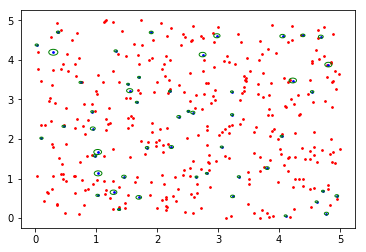

type zip_list0[0]: <class 'tuple'>
(4.0547261161933115, 4.602353085559848)
len zip_list0: 50
nn = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1]
length of nn index =  50
nn index =  [array([], dtype=int64) array([], dtype=int64) array([], dtype=int64)
 array([], dtype=int64) array([], dtype=int64) array([], dtype=int64)
 array([], dtype=int64) array([], dtype=int64) array([], dtype=int64)
 array([], dtype=int64) array([], dtype=int64) array([], dtype=int64)
 array([], dtype=int64) array([], dtype=int64) array([], dtype=int64)
 array([], dtype=int64) array([], dtype=int64) array([], dtype=int64)
 array([290,  52]) array([103]) array([235]) array([], dtype=int64)
 array([], dtype=int64) array([], dtype=int64) array([], dtype=int64)
 array([], dtype=int64) array([], dtype=int64) array([], dtype=int64)
 array([], dtype=int64) array([], dtype=int64) array([], dtype=int64)
 array([], dtype=int64) array([], dtype=int64) array([], dtype=i

In [16]:
# Counting near neighbors using KDTree
# Result is an array of the number of near neighbors each LRG has

dist = []
for i in range(len(kpc_DA)):
    dist.append((distance_kpc / kpc_DA[i]) * 1./3600.) 

print("len dist is", len(dist))
print('len ra is', len(x0))
print(type(x1))
print(type(y1))
print(type(x0))
print(type(y0))

# Plots LRG sources and EDR sources
plt.scatter(x1, y1, s = 3, color='red')
plt.scatter(x0, y0, s = 3, color='blue')

# Draws circle of some radius around the LRG sources
# Circles too small to really see in the plot, but I have tested it with bigger radii to make sure it works if I
# ever need it.
circle = []
for i in range(len(x0)):
    circle = plt.Circle((x0[i],y0[i]), dist[i], color='green', fill=False)
    plt.gcf().gca().add_artist(circle)

plt.show()

# Creates a list of ordered pairs; zips ra and dec together so they can be fed into KDTree
# zip_list0 = list(zip(x0, y0))
zip_list0 = list(zip(x0, y0)) # Fake LRG sources
zip_list1 = list(zip(x1, y1)) # Fake EDR sources
# print(type(zip_list))
# print(zip_list)
print('type zip_list0[0]:',type(zip_list0[0]))
print(zip_list0[0])
print('len zip_list0:', len(zip_list0))

# Creates a tree of EDR sources
gal_tree = KDTree(zip_list1)

# returns a list of EDR sources that are within some radius r of an LRG
nn = gal_tree.query_radius(zip_list0,r=dist,count_only=True)
print("nn =", nn)
# print("length of nn = ", len(nn))

# find indices of near neighbors
ind = gal_tree.query_radius(zip_list0,r=dist)
print("length of nn index = ", len(ind))
print("nn index = ", ind)
# print("index 0 =", ind[0])
# print("index 1 =", ind[1])
# print("index 2 =", ind[2])
# print("index 3 =", ind[3])
# print("index 4 =", ind[4])
# print("index 5 =", ind[5])
# print("index 6 =", ind[6])
# print("index 7 =", ind[7])
# print("index 8 =", ind[8])
# print("index 9 =", ind[9])

# print(type(ind[0]))
# print(type(ind))

total_ind = np.concatenate(ind)
print("total index array: ", total_ind)
print(len(total_ind))

# Array that gives actual number of near neighbors for every LRG
num = []

for i in range(len(ind)):
    num.append(len(ind[i]))

print("num is", num)
print("length of num is", len(num))

# print(type(ind))
# print(type(ind[0]))

In [17]:
# Create 2D histograms in bins of color and magnitude for near neighbors found above
# Result is a 2D array of the number of near neighbors for every LRG in bins of color and magnitude.

near = []

# Creates one list of number of near neighbors for every LRG (number of lists = number of LRGs)
for i in range(len(ind)):
    if len(ind[i]) == 0:
        hist2d = np.zeros((len(xedges)-1,len(yedges)-1))
        near.append(hist2d)
#         print("list is empty")
#         print(near)
#         print(np.shape(hist2d))
    else:
#         print(ind[i])
#         print(i)
        hist2d, x_notuse, y_notuse = np.histogram2d(rmag_survey[ind[i]], color_survey[ind[i]], bins=(xedges, yedges), normed=False)
        near.append(hist2d)
#         print('list is not empty')
#         print(hist2d)
#         print(np.shape(hist2d))

print(np.shape(near))
# print(np.shape(hist2d))
# print(len(hist2d))
# # print(near)
# print(len(near))

sumnear = []
for i in range(len(near)):
    sumnear.append(np.sum(near[i]))
    
nearmean = np.mean(sumnear)
print(nearmean)

(50, 11, 13)
0.1


In [7]:
# Make CMDs for LRG near neighbors

# First, make one CMD for one set of near neighbors 

# Magnitudes for survey sources
# for i in range(1000):
#     gmag_survey = [random.uniform(1,100) for j in range(100)]
#     rmag_survey = [random.uniform(1,100) for j in range(100)]
    
# print("length gmag_survey = ", len(gmag_survey))
# print("length rmag_survey = ", len(rmag_survey))
# print("gmag_survey = ", gmag_survey[0])
# print("rmag_survey = ", rmag_survey[0])

# ra = x1
# dec = y1
# index = []
# print("length ind = ", len(ind))

# for i in range(len(ind)):
#     index = ind[i]
#     index_full = []
# #     print("index = ", index)
# #     print(type(index))
#     for j in range(len(index)):
#         index_full.append(index[j])
#     print("index_full = ", index_full)
#     print("first index = ", index_full[0])
#     gmag_near = []
#     rmag_near = []
#     color = []
#     for k in range(len(index_full)):
#         gmag_near.append(gmag_survey[index_full[k]])
#         rmag_near.append(rmag_survey[index_full[k]])
#     print("length gmag = ", len(gmag_near))
#     print("length rmag = " , len(rmag_near))
#     color.append(np.array(gmag_near) - np.array(rmag_near))
#     plt.scatter(rmag_near, color, color = "teal")
#     plt.show()
    

# gmag_near0 = []
# rmag_near0 = []

# for i in range(len(ind0)):
#     gmag_near0.append(gmag_survey[ind0[i]])
#     rmag_near0.append(rmag_survey[ind0[i]])

# # print(gmag_near0)
# # print(rmag_near0)
# print(len(ind0))
# print(len(gmag_near0))
# print(len(rmag_near0))
# print(type(rmag_near0))

# gmag_near0 = np.array(gmag_near0)
# rmag_near0 = np.array(rmag_near0)

# color = gmag_near0 - rmag_near0

# plt.scatter(rmag_near0, color, color="teal")
# plt.show()

In [26]:
# Calculate NUMBER OF EXPECTED INTERLOPER GALAXIES (Nbkg)

# Distance from which we are looking for satellites around the LRGs
distance_r2 = 2. # in Mpc
distance_r2_kpc = distance_r2 * 10.**3. # in kpc

dist_r2 = []
for i in range(len(kpc_DA)):
    dist_r2.append((distance_r2_kpc / kpc_DA[i]) * 1./3600.) 

# Creates a list of ordered pairs; zips ra and dec together so they can be fed into KDTree
zip_list_LRG = list(zip(x0, y0)) # Fake LRG sources
zip_list_BKG = list(zip(x1, y0)) # Fake EDR sources
# print(zip_list_lrg)
# print(type(zip_list_BKG))
# print(zip_list_LRG[0])
# print(type(zip_list_LRG[0]))
# print(type(zip_list_BKG[0]))
# print('len zip_list_LRG', len(zip_list_LRG))

# Creates a tree of EDR sources
gal_tree_r2 = KDTree(zip_list_BKG)

# returns a list of EDR sources that are within some radius r of an LRG
nn_r2 = gal_tree_r2.query_radius(zip_list_LRG,r=dist_r2,count_only=True)

# find indices of near neighbors
# creates a list of arrays that include the indices of satellite galaxies per LRG. In general, some or all of these
# arrays could be empty
ind_r2 = gal_tree_r2.query_radius(zip_list_LRG,r=dist_r2)
# print(ind)
# print(type(ind[5]))
ind5_r2 = ind_r2[0]
print(ind5_r2)
print(len(ind5_r2))


# Distance from which we are looking for satellites around the LRGs
distance_r3 = 10. # in Mpc
distance_r3_kpc = distance_r3 * 10.**3. # in kpc

dist_r3 = []
for i in range(len(kpc_DA)):
    dist_r3.append((distance_r3_kpc / kpc_DA[i]) * 1./3600.) 

# Creates a list of ordered pairs; zips ra and dec together so they can be fed into KDTree
zip_list_LRG = list(zip(x0, y0)) # Fake LRG sources
zip_list_BKG = list(zip(x1, y1)) # Fake EDR sources
# print(zip_list_lrg)
# print(type(zip_list_BKG))
# print(zip_list_LRG[0])
# print(type(zip_list_LRG[0]))
# print(type(zip_list_BKG[0]))
# print('len zip_list_LRG', len(zip_list_LRG))

# Creates a tree of EDR sources
gal_tree_r3 = KDTree(zip_list_BKG)

# returns a list of EDR sources that are within some radius r of an LRG
nn_r3 = gal_tree_r3.query_radius(zip_list_LRG,r=dist_r3,count_only=True)

# find indices of near neighbors
# creates a list of arrays that include the indices of satellite galaxies per LRG. In general, some or all of these
# arrays could be empty
ind_r3 = gal_tree_r3.query_radius(zip_list_LRG,r=dist_r3)
# print(ind)
# print(type(ind[5]))
ind5_r3 = ind_r3[0]
print(ind5_r3)
print(len(ind5_r3))

diff = len(ind_r3[0]) - len(ind_r2[0])
print(diff)

print(len(ind_r3))

# l3 = [x for x in ind5_r3 if x not in ind5_r2]
# print(len(l3))


def CommonInd(list1, list2):
    annulus_ind = []

    for i in range(len(list1)):
        l3 = [x for x in list1[i] if x not in list2[i]]
        annulus_ind.append(l3)
        
    return(annulus_ind)

new_ind = CommonInd(ind_r3, ind_r2)
print(len(new_ind))

print(len(new_ind[0]))

new_ind = np.asarray(new_ind)

[]
0
[ 18 132 238 229 307 259 142 230 151 138 279  44 336 109 100 208 342 170
 128 267 130 313]
22
22
50
50
22


In [31]:
# print(new_ind.shape)

# print(len(dist_r2))
# print(len(dist_r3))

r2 = []
for i in range(len(kpc_DA)):
    r2.append((distance_r2_kpc / kpc_DA[i])) 
    
r3 = []
for i in range(len(kpc_DA)):
    r3.append((distance_r3_kpc / kpc_DA[i])) 

area_r2 = []
for i in range(len(dist_r2)):
    area_r2.append((np.pi * dist_r2[i] ** 2.))
    
area_r3 = []
for i in range(len(dist_r3)):
    area_r3.append((np.pi * dist_r3[i] ** 2.))
    
area_annulus = []
for i in range(len(dist_r3)):
    area_annulus.append(area_r3[i] - area_r2[i])
    
print(len(area_r2))
print(len(area_r3))
print(len(area_annulus))


# Creates one list of number of near neighbors for every LRG (number of lists = number of LRGs)
# LOCAL_BKG is the list of 2D arrays of survey galaxies as a function of color and magnitude
local_bkg = []

for i in range(len(new_ind)):
    # Creates a zero array if there are no near neighbors
    if len(new_ind[i]) == 0:
        hist2d = np.zeros((len(xedges) - 1, len(yedges) - 1))
        local_bkg.append(hist2d)
    # Creates a 2D histogram for satellite galaxies
    else:
        hist2d, x_notuse, y_notuse = np.histogram2d(rmag_survey[new_ind[i]], color_survey[new_ind[i]], bins=(xedges, yedges), normed=False)
        local_bkg.append(hist2d)
        
sigma = []
for i in range(len(area_annulus)):
    sigma.append(local_bkg[i] / area_annulus[i])
                 
omega = []

for i in range(len(kpc_DA)):
    omega.append((np.pi * distance_kpc ** 2.) / (kpc_DA[i]) ** 2.)  # in square arcsec
                 
Nbkg = []
for i in range(len(omega)):
    Nbkg.append((sigma[i] * omega[i]))
                 
Nbkg = np.asarray(Nbkg)
print(Nbkg.shape)

# print(Nbkg)
print(area_annulus)

num = []
for i in range(len(new_ind[i])):
    num.append(len(new_ind[i]))
    
print(np.amax(num))
# print(sigma)
print(omega)

50
50
50
(50, 11, 13)
[2.305923446442805, 0.6627350708069354, 0.8837988440075744, 1.4488895140773006, 6.676254440977455, 3.8637226979698456, 1.8716477571781631, 4.888392473955764, 0.6382738015131463, 1.2540800721458083, 3.676630077638554, 0.839186869798514, 0.8027176936410338, 1.2953812267997298, 1.1615631405802365, 0.9076874868508051, 1.651872696160072, 0.6391146733423231, 4.085534003174186, 0.818361792686651, 4.504270398433217, 0.6730224312744022, 0.6982430037668328, 0.8164527257924645, 0.6825119044683245, 0.7599453471191021, 1.063541058990205, 0.7183763268113148, 0.6334937948219623, 1.305084956701597, 2.552991182083142, 0.6381110864432713, 4.797771553063909, 0.708597818001507, 0.8872001832658418, 3.204122553995696, 0.7120578340721778, 0.959246776328259, 3.1225244724043, 1.3502703999672656, 0.8135181538279096, 1.0409953742681848, 1.393357553332155, 1.4152689241343774, 1.9739557279826996, 1.5786507496680704, 0.7755395634074211, 0.6810120901951497, 0.8601064571878463, 0.981539650939561

(50, 11, 13)
Nbkg is [[ 0.          0.          0.          0.          0.          0.00187665
   0.00075066  0.00150132  0.          0.00112599  0.00075066  0.00150132
   0.00150132]
 [ 0.          0.          0.          0.          0.00187665  0.00187665
   0.00037533  0.00187665  0.00225198  0.00150132  0.00262731  0.00150132
   0.        ]
 [ 0.          0.          0.          0.          0.00075066  0.00225198
   0.00337798  0.00225198  0.00262731  0.00112599  0.00187665  0.00037533
   0.        ]
 [ 0.          0.          0.          0.00037533  0.00150132  0.00225198
   0.00150132  0.00112599  0.00187665  0.00262731  0.00150132  0.00075066
   0.        ]
 [ 0.          0.          0.          0.00150132  0.00150132  0.00225198
   0.00112599  0.00150132  0.00187665  0.00262731  0.00075066  0.          0.        ]
 [ 0.          0.          0.00037533  0.00075066  0.00225198  0.00187665
   0.00075066  0.00187665  0.          0.00150132  0.00037533  0.          0.        ]
 [ 0.

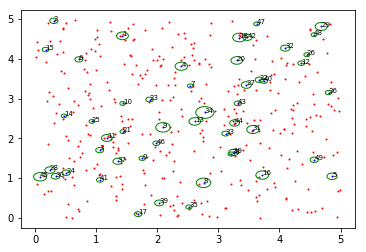

In [8]:
# Calculates number of expected interloper galaxies by first calculating the solid angle omega enclosed in radius r from 
# the LRG. Then find the number of interloper galaxies by multiplying omega by the surface density to find the 
# number of interloper galaxies as a function of color and magnitude.

# area = []
# area = np.pi * distance**2. # in square Mpc
# print("comoving radial distance = ",DCMR_Mpc)

# Calculate solid angle omega for every rad
omega = []

for i in range(len(kpc_DA)):
    omega.append((np.pi * distance_kpc**2.)/(kpc_DA[i])**2.) # in square arcsec

# print("rad is", rad)
# print("omega is", omega)
# print(type(omega))
# print(r[1]) 


# Multiply omega by the surface density
# Like the code above, this needs to be reshaped to make bins of color and magnitude.
Nbkg = []

for i in range(len(omega)):
    bkg = sd * omega[i]
    Nbkg.append(bkg)
#     print(i)
#     print(Nbkg[i])
    
print(np.shape(Nbkg))
print("Nbkg is", Nbkg[0])
    
# Plots LRG sources and EDR sources
plt.scatter(x1, y1, s = 1, color='red')
plt.scatter(x0, y0, s = 1, color='blue')

circle = []
for i in range(len(x0)):
    circle = plt.Circle((x0[i],y0[i]), dist[i], color='green', fill=False)
    plt.gcf().gca().add_artist(circle)
    
a = np.arange(0,50)
for i, txt in enumerate(a):
    text = plt.annotate(txt, (x0[i],y0[i]))
    text.set_fontsize(7)
    
# plt.xlim(0.,1.)
# plt.ylim(1.,2.)
plt.show()

In [9]:
print(sd)
print("")
print(omega)
print("")
print(sd[0])
print(sd[0]*omega[0])


[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.54320988e-08   6.17283951e-09   1.23456790e-08
    0.00000000e+00   9.25925926e-09   6.17283951e-09   1.23456790e-08
    1.23456790e-08]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.54320988e-08   1.54320988e-08   3.08641975e-09   1.54320988e-08
    1.85185185e-08   1.23456790e-08   2.16049383e-08   1.23456790e-08
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    6.17283951e-09   1.85185185e-08   2.77777778e-08   1.85185185e-08
    2.16049383e-08   9.25925926e-09   1.54320988e-08   3.08641975e-09
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   3.08641975e-09
    1.23456790e-08   1.85185185e-08   1.23456790e-08   9.25925926e-09
    1.54320988e-08   2.16049383e-08   1.23456790e-08   6.17283951e-09
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.23456790e-08
    1.2345

In [13]:
# Calculate number of satellite galaxies by subtracting interloper galaxies from near neighbor galaxies as a function 
# of color and magnitude.

Nsat = np.array(near) - np.array(Nbkg)

# print(len(Nsat))
# print(np.shape(Nsat))
# print(Nsat[0])
# print(type(Nsat))
# Nsat = np.array(Nsat)
# print(type(Nsat))

# print("Nsat0")
# plt.imshow(Nsat[0], cmap=plt.cm.PuRd, extent=(xedges[0], xedges[len(xedges)-1], yedges[0], yedges[len(yedges)-1]))
# plt.colorbar(orientation='vertical')
# plt.gca().invert_xaxis()
# # plt.title("Surface Density Histogram")
# plt.show()
# print("")

# print("Nsat1")
# plt.imshow(Nsat[1], cmap=plt.cm.PuRd, extent=(xedges[0], xedges[len(xedges)-1], yedges[0], yedges[len(yedges)-1]))
# plt.colorbar(orientation='vertical')
# plt.gca().invert_xaxis()
# # plt.title("Surface Density Histogram")
# plt.show()
# print("")

# print("Nsat2")
# plt.imshow(Nsat[2], cmap=plt.cm.PuRd, extent=(xedges[0], xedges[len(xedges)-1], yedges[0], yedges[len(yedges)-1]))
# plt.colorbar(orientation='vertical')
# plt.gca().invert_xaxis()
# # plt.title("Surface Density Histogram")
# plt.show()
# print("")

In [14]:
# In which I try to make a table of this data so I can actually analyze it

# import pandas as pd
# from tabulate import tabulate

# # x = [1,2,3,4]
# # y = ['one', 'two', 'three', 'four']

# # d = {'x': x, 'y': y}

# sumsat = []
# sumbkg = []
# sumnear = []

# for i in range(len(Nsat)):
#     sumsat.append(np.sum(Nsat[i]))

# for i in range(len(Nbkg)):
#     sumbkg.append(np.sum(Nbkg[i]))
    
# for i in range(len(near)):
#     sumnear.append(np.sum(near[i]))


# d = {'projected radius': dist, 'LRG redshift': z_lrg, 'number of near neighbors': num, 'number of interlopers': sumbkg, 'number of satellites': sumsat}

# # fig, ax = plt.subplots()
# # fig.patch.set_visible(False)
# # ax.axis('off')
# # ax.axis('tight')

# df = pd.DataFrame(data=d)

# print(tabulate(df, headers='keys', tablefmt='latex'))

# # ax.table(cellText=df.values, colLabels=df.columns, loc='center')
# # fig.tight_layout()
# # plt.show()

# meannear = np.mean(sumnear)
# print("nearmean is", meannear)

# sdnear = np.std(sumnear)
# print("sdnear", sdnear)

# meanbkg = np.mean(sumbkg)
# print("meankbg is", meanbkg)

# sdbkg = np.std(sumbkg)
# print("sdbkg is", sdbkg)

# meansat = np.mean(sumsat)
# print("meansat is", meansat)

# sdsat = np.std(sumsat)
# print("sdsat is", sdsat)

# plt.hist(sumsat, bins=50)
# plt.show()

mean near neighbor is 0.38
standard deviation of near neighbor is 0.745385806143
mean interloper is 0.262681721837
standard deviation of interloper is 0.17495527269
mean number of satellites is 0.117318278163
median number of satellites is -0.137310623144
standard deviation of satellites is 0.70322868405


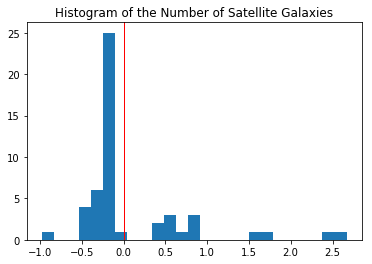

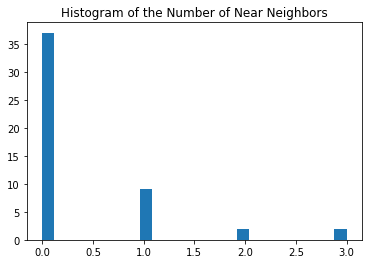

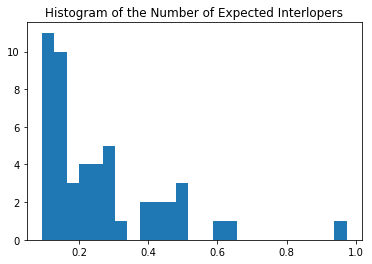

In [16]:
sumsat = []
sumbkg = []
sumnear = []

# Sum up number of satellite galaxies for every LRG
for i in range(len(Nsat)):
    sumsat.append(np.sum(Nsat[i]))

# Sum up number of background galaxies for every LRG
for i in range(len(Nbkg)):
    sumbkg.append(np.sum(Nbkg[i]))
    
# Sum up number of near neighbors for every LRG
for i in range(len(near)):
    sumnear.append(np.sum(near[i]))

meannear = np.mean(sumnear)
print("mean near neighbor is", meannear)

sdnear = np.std(sumnear)
print("standard deviation of near neighbor is", sdnear)

meanbkg = np.mean(sumbkg)
print("mean interloper is", meanbkg)

sdbkg = np.std(sumbkg)
print("standard deviation of interloper is", sdbkg)

meansat = np.mean(sumsat)
print("mean number of satellites is", meansat)

medsat = np.median(sumsat)
print("median number of satellites is", medsat)

sdsat = np.std(sumsat)
print("standard deviation of satellites is", sdsat)

plt.title("Histogram of the Number of Satellite Galaxies")
plt.hist(sumsat, bins=25)
plt.axvline(linewidth=1, color='r')
plt.show()

plt.title("Histogram of the Number of Near Neighbors")
plt.hist(sumnear, bins=25)
plt.show()

plt.title("Histogram of the Number of Expected Interlopers")
plt.hist(sumbkg, bins=25)
plt.show()


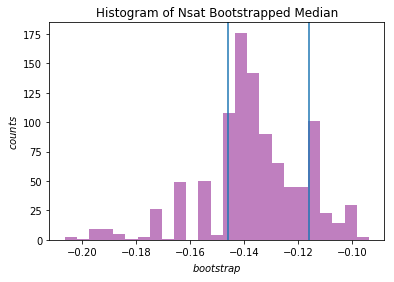

The median of Nsat: -0.137310623144
The median of bootmed: -0.137310623144
The standard deviation of bootmed: 0.0183610182748
Low 68% confidence interval: -0.145919117433
High 68% confidence interval: -0.11614825925


In [17]:
def boot_med_plot(niter, confint, boot_func, array):

    from astropy.stats import bootstrap
    from astropy.utils import NumpyRNGContext

# niter = 1000
    with NumpyRNGContext(1):
        bootmed = bootstrap(np.asarray(array), bootnum=niter, bootfunc=boot_func)
#         bootmean = bootstrap(np.asarray(sumsat), bootnum=niter, bootfunc=np.mean)
    

# Compute confidence interval of median

#     confint = 0.68
    sortmed = sorted(bootmed)
    lowind = int(round((1 - confint)/2*niter, 2))
    highind = int(round((1-((1 - confint)/2))*niter, 2))
    
    plt.title("Histogram of Nsat Bootstrapped Median")
    plt.hist(bootmed, bins=25, color='purple', alpha=0.5)
# plt.hist(bootmean, bins=25, color='violet', alpha=0.5)
    plt.axvline(x=sortmed[lowind])
    plt.axvline(x=sortmed[highind])
    plt.xlabel(r'$bootstrap$')
    plt.ylabel(r'$counts$')
    plt.show()

    print("The median of Nsat:", np.median(array))
    print("The median of bootmed:", np.median(bootmed))
    print("The standard deviation of bootmed:", np.std(bootmed))
#     print("The mean of Nsat:", np.mean(sumsat))
    print("Low 68% confidence interval:", sortmed[lowind])
    print("High 68% confidence interval:", sortmed[highind])
    
    

boot_med_plot(1000, 0.68, np.median, sumsat)